# Entrepreneurs Image Classification Using **SVM Model** and **OpenCV**

## Loading required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

## Loading Haar Cascade Files

In [3]:
face_cascade = cv2.CascadeClassifier('opencv_harcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv_harcascades\\haarcascade_eye.xml')
eye_glass_cascade = cv2.CascadeClassifier('opencv_harcascades\\haarcascade_eye_tree_eyeglasses.xml')
profile_face_cascade = cv2.CascadeClassifier('opencv_harcascades\\haarcascade_profileface.xml')
face_cascade_alt = cv2.CascadeClassifier('opencv_harcascades\\haarcascade_frontalface_alt.xml')

## Image Data Cleaning and Preprocessing

In [4]:
img = cv2.imread('./entrepreneurs_images/jack_ma/jack_ma_1.jpg')

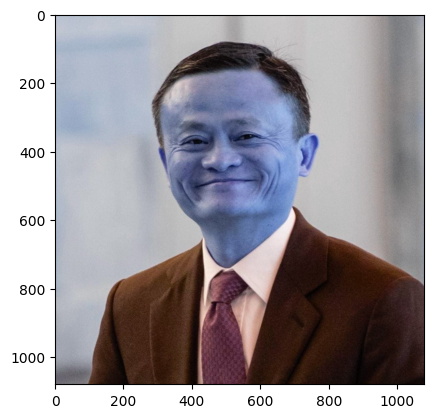

In [5]:
plt.imshow(img)

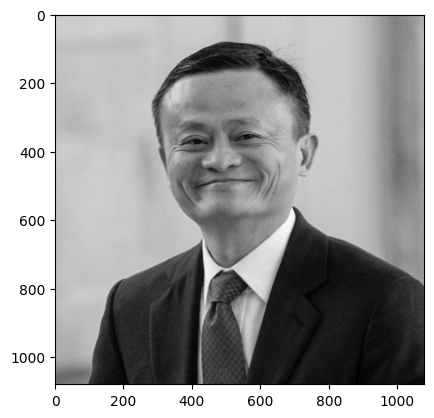

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [7]:
img_gray

array([[196, 196, 196, ..., 170, 172, 173],
       [197, 197, 197, ..., 172, 174, 175],
       [198, 198, 198, ..., 173, 175, 176],
       ...,
       [112, 114, 115, ...,  12,  13,  14],
       [108, 112, 116, ...,  12,  13,  14],
       [106, 112, 118, ...,  13,  13,  14]], dtype=uint8)

In [10]:
faces = face_cascade.detectMultiScale(img_gray)
faces

array([[277, 201, 411, 411]], dtype=int32)

In [11]:
x,y,w,h = faces[0]

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2
                         )



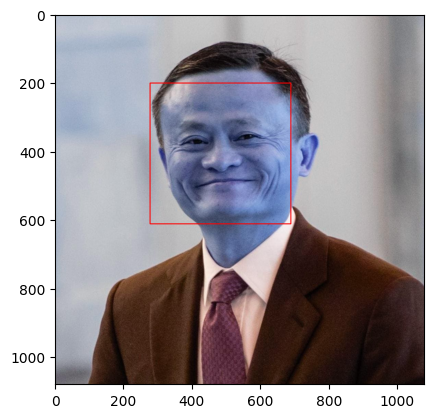

In [13]:
plt.imshow(face_img)

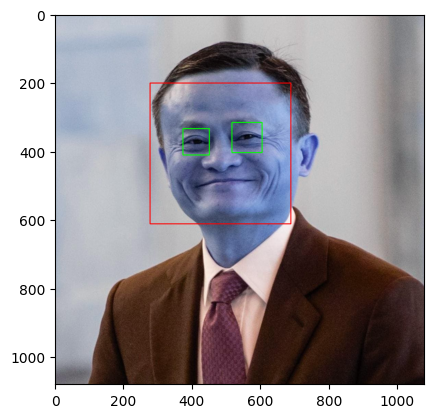

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    # eyes = eye_cascade.detectMultiScale(roi_gray)
    eye_glass = eye_glass_cascade.detectMultiScale(roi_gray, 1.1, 3)
    for (ex,ey,ew,eh) in eye_glass:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

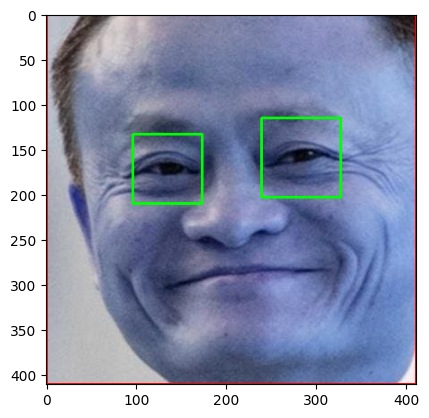

In [15]:
plt.imshow(roi_color)

In [16]:
# Code for renaming all images within folders

# directory = 'entrepreneurs_images'

# for folder in os.listdir(directory):
#     if folder == 'bill_gates':
#         path = os.path.join(directory, folder)
#         for index, file in enumerate(os.listdir(path)):
#             ext = file.split('.')[-1]
#             file_path = os.path.join(path, file)
#             new_name = folder + '_' + str(index+1) + '.' + ext
#             new_path = os.path.join(path, new_name)
#             os.rename(file_path, new_path)
        

### Function for detecting and extracting visible faces from image.

In [8]:
cv2.destroyAllWindows()
img = 'entrepreneurs_images/bill_gates/bill_gates_24.jpg'


def get_visible_face(img):
    """
    Detects visible faces in an image and extracts them as separate image regions.

    Parameters:
    -----------
    img : str or np.array
        The image to process, either as a file path (if a string) or an already loaded image array.

    Returns:
    --------
    list of np.array
        A list of face regions extracted from the input image, where each face is represented as a color image (ROI).
    """

    # Load the image if a file path is provided
    img = cv2.imread(img)
    
    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image using the pre-trained Haar Cascade classifier
    faces = face_cascade_alt.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(64, 64))

    # List to store extracted face images
    face_images = []

    # Loop through all detected faces and extract the regions of interest (ROI)
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face (optional)
        face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Crop and extract the region of interest for both grayscale and color images
        roi_gray = gray[y:y+h, x:x+w]   # Grayscale face region (optional for further processing)
        roi_color = face_img[y:y+h, x:x+w]  # Color face region

        # Append the extracted color face region to the list
        face_images.append(roi_color)
    
    return face_images


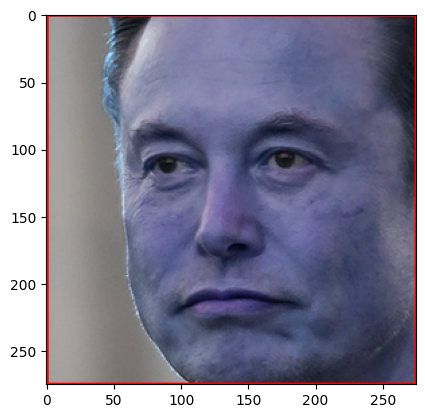

In [9]:
plt.imshow(get_visible_face('./entrepreneurs_images/elon_musk/elon_musk_26.jpg')[0])

### Code for cleaning the cleaned data directory - **Run with caution!**

In [17]:
import os
import shutil

cleaned_directory = 'cropped_images'
if os.path.exists(cleaned_directory):
    shutil.rmtree(cleaned_directory)  # Removes the directory even if it is not empty
os.mkdir(cleaned_directory)  # Creates a new empty directory

In [15]:
directory = 'entrepreneurs_images'
category_items_dict = {}

for folder in os.listdir(directory):
    path = os.path.join(directory, folder)
    files = []
    print(folder)
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        print(file_path)
        files.append(file_path)
    print('_'*50)
    category_items_dict[folder] = files
        

bill_gates
entrepreneurs_images\bill_gates\bill_gates_1.jpg
entrepreneurs_images\bill_gates\bill_gates_10.jpg
entrepreneurs_images\bill_gates\bill_gates_11.jpeg
entrepreneurs_images\bill_gates\bill_gates_12.jpg
entrepreneurs_images\bill_gates\bill_gates_13.jpeg
entrepreneurs_images\bill_gates\bill_gates_14.jpeg
entrepreneurs_images\bill_gates\bill_gates_15.jpg
entrepreneurs_images\bill_gates\bill_gates_16.jpg
entrepreneurs_images\bill_gates\bill_gates_17.webp
entrepreneurs_images\bill_gates\bill_gates_18.jpg
entrepreneurs_images\bill_gates\bill_gates_19.jpg
entrepreneurs_images\bill_gates\bill_gates_2.jpg
entrepreneurs_images\bill_gates\bill_gates_20.jpg
entrepreneurs_images\bill_gates\bill_gates_21.png
entrepreneurs_images\bill_gates\bill_gates_22.jpg
entrepreneurs_images\bill_gates\bill_gates_23.jpg
entrepreneurs_images\bill_gates\bill_gates_24.jpg
entrepreneurs_images\bill_gates\bill_gates_25.jpeg
entrepreneurs_images\bill_gates\bill_gates_26.jpg
entrepreneurs_images\bill_gates\bill

### Data cleaning i.e extracting and saving cropped faces for images.

In [20]:

cleaned_directory = 'cropped_images'

for category, items in category_items_dict.items():
    path = os.path.join(cleaned_directory, category)
    # os.mkdir(path)
    if os.path.exists(path):
        print("Data already cleaned and exists!\nPath:", path)
        continue
    else:
        os.mkdir(path)
        for item in items:
            file_name = os.path.basename(item).split('.')[0]
            ext = os.path.basename(item).split('.')[-1]
            # file_path = os.path.join(path, os.path.basename(item))
            print(file_name)
            faces = get_visible_face(item)

            if faces is not None:
                if len(faces) >= 1:
                    for i,face in enumerate(faces):
                        file = file_name + '_' + str(i+1) + '.' + ext
                        file_path = os.path.join(cleaned_directory, category, file)
                        cv2.imwrite(file_path, face)


Data already cleaned and exists!
Path: cropped_images\bill_gates
Data already cleaned and exists!
Path: cropped_images\elon_musk
Data already cleaned and exists!
Path: cropped_images\irfan_malik
Data already cleaned and exists!
Path: cropped_images\jack_ma
Data already cleaned and exists!
Path: cropped_images\ritesh_agarwal
Data already cleaned and exists!
Path: cropped_images\steve_jobs


### Wavelet transformation code from Stackoverflow.

In [10]:
import pywt   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [11]:
test_img = get_visible_face('./entrepreneurs_images/bill_gates/bill_gates_1.jpg')[0]

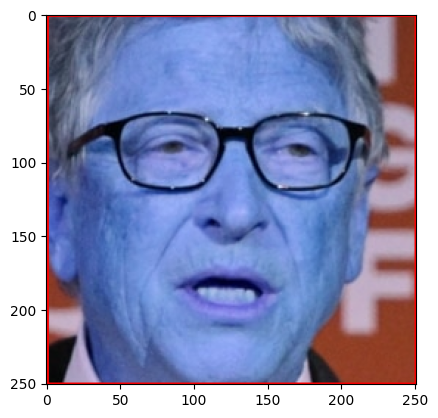

In [12]:
plt.imshow(test_img)

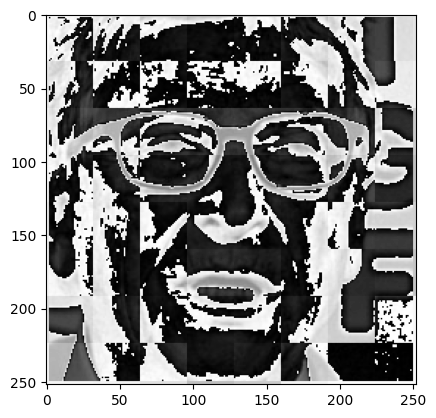

In [29]:
im_har = w2d(test_img,'db1',5)
plt.imshow(im_har, cmap='gray')

**Fun Fact:** Wavelet transforms are a mathematical tool used in image processing to extract information from images.

In [16]:
def augment_image(image):
    augmented_images = []

    # Flip horizontally
    flipped_image = cv2.flip(image, 1)
    augmented_images.append(flipped_image)

    # Rotate the image
    rows, cols = image.shape[:2]
    M_rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), 20, 1)  # Rotate by 20 degrees
    rotated_image = cv2.warpAffine(image, M_rotate, (cols, rows))
    augmented_images.append(rotated_image)

    # Scale the image
    scaled_image = cv2.resize(image, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
    augmented_images.append(scaled_image)

    # Add some random noise
    noise = np.random.randint(0, 50, (image.shape), dtype='uint8')
    noisy_image = cv2.add(image, noise)
    augmented_images.append(noisy_image)

    return augmented_images

In [17]:
# Read the image
image = cv2.imread('cropped_images\\ritesh_agarwal\\ritesh_agarwal_40_1.jpg',0)  # Load image in grayscale

# Apply augmentations
augmented_images = augment_image(image)

len(augmented_images)

4

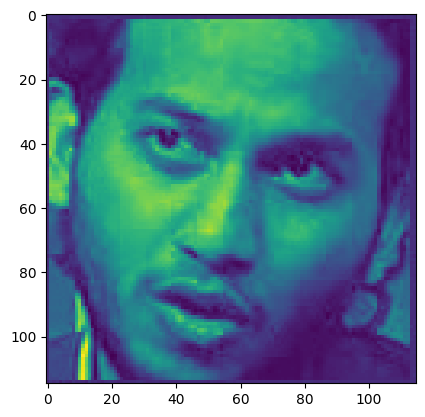

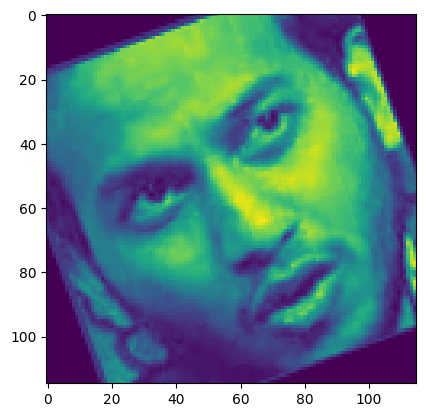

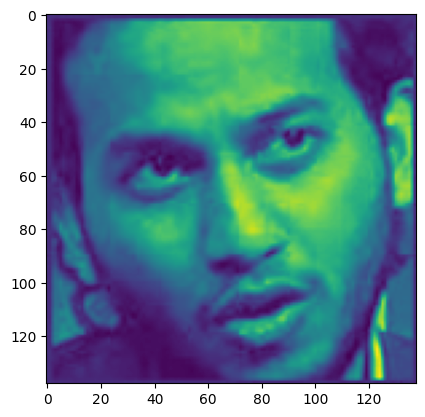

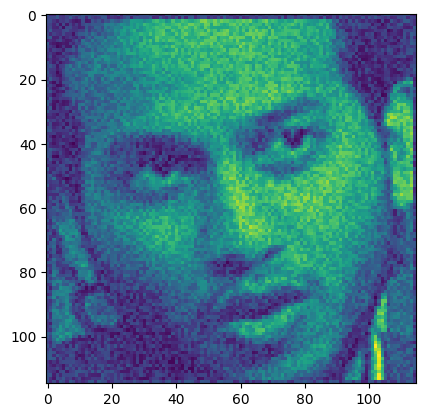

In [18]:
for image in augmented_images:
    plt.imshow(image)
    plt.show()

In [19]:
category_items_dict

{'bill_gates': ['entrepreneurs_images\\bill_gates\\bill_gates_1.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_10.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_11.jpeg',
  'entrepreneurs_images\\bill_gates\\bill_gates_12.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_13.jpeg',
  'entrepreneurs_images\\bill_gates\\bill_gates_14.jpeg',
  'entrepreneurs_images\\bill_gates\\bill_gates_15.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_16.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_17.webp',
  'entrepreneurs_images\\bill_gates\\bill_gates_18.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_19.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_2.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_20.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_21.png',
  'entrepreneurs_images\\bill_gates\\bill_gates_22.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_23.jpg',
  'entrepreneurs_images\\bill_gates\\bill_gates_24.jpg',
  'entrepreneur

In [20]:
directory = 'cropped_images'
cleaned_images = {}

for folder in os.listdir(directory):
    path = os.path.join(directory, folder)
    files = []
    print(folder)
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        print(file_path)
        files.append(file_path)
    print('_'*50)
    cleaned_images[folder] = files

bill_gates
cropped_images\bill_gates\augmented_image_0_0.jpg
cropped_images\bill_gates\augmented_image_0_1.jpg
cropped_images\bill_gates\augmented_image_0_2.jpg
cropped_images\bill_gates\augmented_image_0_3.jpg
cropped_images\bill_gates\augmented_image_10_0.jpg
cropped_images\bill_gates\augmented_image_10_1.jpg
cropped_images\bill_gates\augmented_image_10_2.jpg
cropped_images\bill_gates\augmented_image_10_3.jpg
cropped_images\bill_gates\augmented_image_11_0.jpg
cropped_images\bill_gates\augmented_image_11_1.jpg
cropped_images\bill_gates\augmented_image_11_2.jpg
cropped_images\bill_gates\augmented_image_11_3.jpg
cropped_images\bill_gates\augmented_image_12_0.jpg
cropped_images\bill_gates\augmented_image_12_1.jpg
cropped_images\bill_gates\augmented_image_12_2.jpg
cropped_images\bill_gates\augmented_image_12_3.jpg
cropped_images\bill_gates\augmented_image_13_0.jpg
cropped_images\bill_gates\augmented_image_13_1.jpg
cropped_images\bill_gates\augmented_image_13_2.jpg
cropped_images\bill_gate

In [21]:
cleaned_images

{'bill_gates': ['cropped_images\\bill_gates\\augmented_image_0_0.jpg',
  'cropped_images\\bill_gates\\augmented_image_0_1.jpg',
  'cropped_images\\bill_gates\\augmented_image_0_2.jpg',
  'cropped_images\\bill_gates\\augmented_image_0_3.jpg',
  'cropped_images\\bill_gates\\augmented_image_10_0.jpg',
  'cropped_images\\bill_gates\\augmented_image_10_1.jpg',
  'cropped_images\\bill_gates\\augmented_image_10_2.jpg',
  'cropped_images\\bill_gates\\augmented_image_10_3.jpg',
  'cropped_images\\bill_gates\\augmented_image_11_0.jpg',
  'cropped_images\\bill_gates\\augmented_image_11_1.jpg',
  'cropped_images\\bill_gates\\augmented_image_11_2.jpg',
  'cropped_images\\bill_gates\\augmented_image_11_3.jpg',
  'cropped_images\\bill_gates\\augmented_image_12_0.jpg',
  'cropped_images\\bill_gates\\augmented_image_12_1.jpg',
  'cropped_images\\bill_gates\\augmented_image_12_2.jpg',
  'cropped_images\\bill_gates\\augmented_image_12_3.jpg',
  'cropped_images\\bill_gates\\augmented_image_13_0.jpg',
  'c

In [37]:
for category, files in cleaned_images.items():
    for i, file in enumerate(files):

        image = cv2.imread(file)  # Load image in grayscale

        # Apply augmentations
        augmented_images = augment_image(image)

        for id, aug_img in enumerate(augmented_images):
            cv2.imwrite(f"cropped_images\\{category}\\augmented_image_{i}_{id}.jpg", aug_img)

        

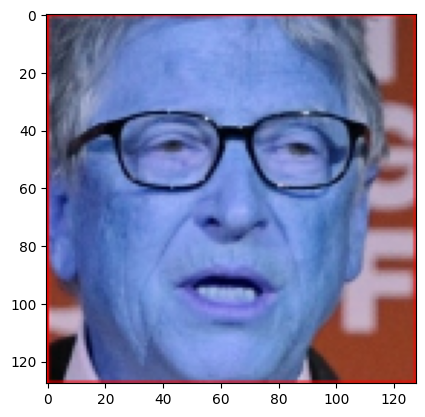

In [39]:
test_img = cv2.imread('cropped_images\\bill_gates\\bill_gates_1_1.jpg')
scaled_test_image = cv2.resize(test_img, (128, 128))
plt.imshow(scaled_test_image)

In [90]:
for category, files in cleaned_images.items():
    for file in files:
        img = cv2.imread(file)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(file, img_gray)

### Mapping entrepreneurs names with numbers.

In [22]:
entrepreuners_dict = { name:i for i,name in enumerate(cleaned_images.keys())}
entrepreuners_dict

{'bill_gates': 0,
 'elon_musk': 1,
 'irfan_malik': 2,
 'jack_ma': 3,
 'ritesh_agarwal': 4,
 'steve_jobs': 5}

### Function for pre-processing the image for more better feature extraction.

In [23]:

def pre_process_image(img, image_size, is_path=False):
    """
    Pre-processes an image by optionally reading it from a file path, applying wavelet decomposition,
    resizing the original and wavelet-decomposed images, and combining them into a single array.

    Parameters:
    -----------
    img : str or np.array
        The image to process, either as a file path (if is_path=True) or an already loaded image array.
    image_size : int
        The size to which both the original and wavelet-decomposed images should be resized.
    is_path : bool, optional
        Flag indicating if `img` is a file path (default is False). If True, the image will be read from the given path.

    Returns:
    --------
    np.array
        A vertically stacked array of the resized original image and wavelet-decomposed image.
    """

    # Load the image if a file path is provided
    if is_path:
        img = cv2.imread(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply wavelet decomposition on the image using the w2d function
    img_har = w2d(img, 'db1', 5)
    
    # Resize the original image and the wavelet-decomposed image
    img_scaled = cv2.resize(img_gray, (image_size, image_size))
    img_har_scaled = cv2.resize(img_har, (image_size, image_size))
    # print(img_scaled.size, img_har_scaled.size)
    
    # Reshape and combine both images into a single vertical array
    combined_img = np.vstack((
        img_scaled.reshape(image_size * image_size, 1),  # Flatten and stack the RGB image
        img_har_scaled.reshape(image_size * image_size, 1)   # Flatten and stack the wavelet-decomposed image
    ))

    return combined_img.reshape(img_scaled.size + img_har_scaled.size)


In [24]:
test = pre_process_image('cropped_images\\bill_gates\\bill_gates_1_1.jpg', 64, is_path = True)

In [25]:
64 * 64 + 64 * 64

8192

In [26]:
test.shape

(8192,)

## Feature Engineering

In [27]:
X = []
y = []

Making Features and target variable.

In [28]:
for category, items in cleaned_images.items():
    for item in items:
        processed_image = pre_process_image(item, 64, is_path = True)
        X.append(processed_image)
        y.append(entrepreuners_dict[category])

In [29]:
len(X)

1520

In [30]:
len(X[0])

8192

In [31]:
X = np.array(X)
X.shape

(1520, 8192)

In [32]:
y = np.array(y)
y.shape

(1520,)

In [33]:
y

array([0, 0, 0, ..., 5, 5, 5])

### Applying StandardScaler or MinMaxScaler to the features and splitting into Train and Test set.

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
y_train

array([4, 1, 0, ..., 4, 1, 5])

In [36]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 10, probability=True))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9078947368421053

In [37]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='linear', probability=True))])

## Cross-validation and Hyper Parameter tuning.

In [40]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=5, random_state=42, shuffle=True)

cross_val_score(pipe, X_train, y_train, cv=cv, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.1s finished


array([0.88888889, 0.83333333, 0.72222222, 0.85185185, 0.77777778])

### Testing different Classifiers to see which performs best on our images dataset.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [42]:
scores = []

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, n_jobs=-1, verbose=2)
    clf.fit(X_train, y_train)
    scores.append({
        'model_name': algo,
        'best_estimator': clf.best_estimator_,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

    
models_df = pd.DataFrame(scores,columns=['model_name', 'best_estimator','best_score','best_params'])
models_df

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


d:\Ali Work\Data Science Work\food-image-classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,model_name,best_estimator,best_score,best_params
0,svm,"(StandardScaler(), SVC(C=1, gamma='auto', kern...",0.807407,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,"(StandardScaler(), (DecisionTreeClassifier(max...",0.529630,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,"(StandardScaler(), LogisticRegression(C=1, mul...",0.811111,{'logisticregression__C': 1}


In [43]:
svm_mdl = models_df['best_estimator'][0]
svm_mdl

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [145]:
log_reg = models_df['best_estimator'][2]
log_reg

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, multi_class='auto',
                                    solver='liblinear'))])

In [147]:
log_reg = LogisticRegression(C=1)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7413793103448276

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pipe.predict(X_test))
cm

array([[55,  1,  0,  1,  1,  2],
       [ 0, 91,  1,  2,  2,  0],
       [ 0,  2, 53,  0,  0,  1],
       [ 4, 11,  1, 59,  0,  1],
       [ 1,  0,  1,  0, 74,  1],
       [ 1,  6,  0,  1,  1, 82]])

In [39]:
classification_report(y_test, pipe.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91        60\n           1       0.82      0.95      0.88        96\n           2       0.95      0.95      0.95        56\n           3       0.94      0.78      0.85        76\n           4       0.95      0.96      0.95        77\n           5       0.94      0.90      0.92        91\n\n    accuracy                           0.91       456\n   macro avg       0.92      0.91      0.91       456\nweighted avg       0.91      0.91      0.91       456\n'

In [40]:
entrepreuners_dict

{'bill_gates': 0,
 'elon_musk': 1,
 'irfan_malik': 2,
 'jack_ma': 3,
 'ritesh_agarwal': 4,
 'steve_jobs': 5}

## Testing and exporting the model.

In [41]:
def predict_entrepreneur_class(img_path):
    face = get_visible_face(img_path)[0]
    plt.imshow(face)
    final_img = pre_process_image(face, 64)
    # final_img = img.reshape(16384)
    en_class = pipe.predict([final_img])
    class_prob = pipe.predict_proba([final_img])
    return en_class, class_prob

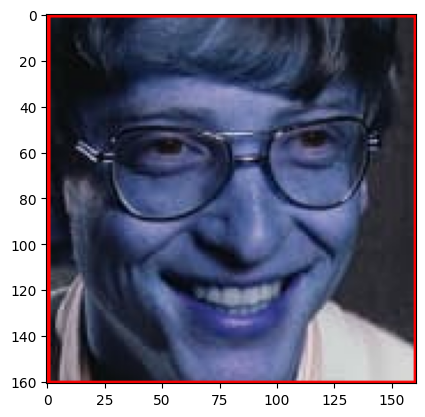

In [44]:
image = './test_images/Bill-Gates2.jpg'
img = cv2.imread(image)
plt.imshow(get_visible_face(image)[0])

This is Bill gates


,probability
bill_gates,0.932587
elon_musk,0.013565
irfan_malik,0.000028
jack_ma,0.002954
ritesh_agarwal,0.001288
steve_jobs,0.049578


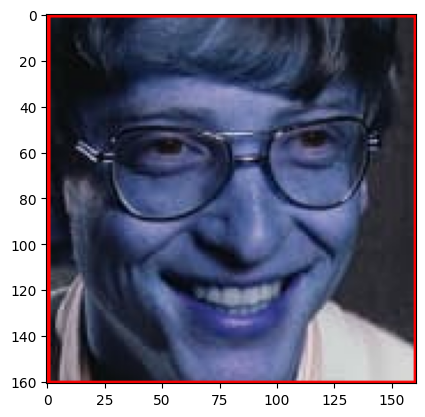

In [45]:
label, probability = predict_entrepreneur_class(image)

for c,i in entrepreuners_dict.items():
    # print(label,i)
    if i == label:
        label = c
        
print('This is', label.replace('_', ' ').capitalize())
pd.DataFrame(probability[0], columns=['probability'], index=entrepreuners_dict.keys())

In [72]:
import joblib

joblib.dump(pipe, 'artifacts/svm_model.pkl')

['artifacts/svm_model.pkl']

In [144]:
import json

json.dump(entrepreuners_dict, open('artifacts/labels.json', 'w'))